In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [2]:
test_each_state = requests.get('https://api.covid19india.org/state_test_data.json', params = 'state')
#print (test_each_state.json())

In [3]:
test_each_state_csv = pd.read_csv('https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv')
#print (test_each_state_csv)
print (test_each_state_csv.columns)
state_positive = test_each_state_csv.loc[(test_each_state_csv.State == 'West Bengal'),['Updated On','State', 'Total Tested', 'Positive']]
print (state_positive.iloc[-30: ])


Index(['Updated On', 'State', 'RT PCR Tests', 'Antigen Tests', 'Other Tests',
       'Total Tested', 'Tag (Total Tested)', 'Positive', 'Negative',
       'Unconfirmed', 'Cumulative People In Quarantine',
       'Total People Currently in Quarantine', 'Tag (People in Quarantine)',
       'Total People Released From Quarantine', 'People in ICU',
       'People on Ventilators', 'Num Isolation Beds', 'Num ICU Beds',
       'Num Ventilators', 'Total PPE', 'Total N95 Masks',
       'Corona Enquiry Calls', 'Num Calls State Helpline', 'Source1',
       'Source2', 'Source3', 'Test positivity rate', 'Tests per thousand',
       'Tests per million', 'Tests per positive case',
       'Population NCP 2019 Projection', 'Unnamed: 31'],
      dtype='object')
      Updated On        State  Total Tested  Positive
4918  07/08/2020  West Bengal     1054509.0   89666.0
4919  08/08/2020  West Bengal     1079657.0   92615.0
4920  09/08/2020  West Bengal     1105899.0   95554.0
4921  10/08/2020  West Bengal  

In [4]:
state_wise_confirmed = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')

state_wise_confirmed1 = state_wise_confirmed[['Date','State', 'Confirmed', 'Tested']]
#print (state_wise_confirmed.iloc[-36: ])
state_wise_confirmed1.loc[state_wise_confirmed1['Date'] == '2020-09-04']

,Date,State,Confirmed,Tested
6161,2020-09-04,Andaman and Nicobar Islands,3257,37825.0
6162,2020-09-04,Andhra Pradesh,476506,3965694.0
6163,2020-09-04,Arunachal Pradesh,4775,180372.0
6164,2020-09-04,Assam,121225,2435830.0
6165,2020-09-04,Bihar,144134,3721250.0
6166,2020-09-04,Chandigarh,5268,33572.0
6167,2020-09-04,Chhattisgarh,40634,634702.0
6168,2020-09-04,Delhi,185220,1705571.0
6169,2020-09-04,Dadra and Nagar Haveli and Daman and Diu,2510,55345.0
6170,2020-09-04,Goa,19863,208917.0


In [82]:
state_all = state_wise_confirmed1['State'].unique().tolist()
state_all.remove('State Unassigned')
print (state_all)

['Kerala', 'India', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana', 'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir', 'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh', 'Himachal Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Goa', 'Mizoram', 'Andaman and Nicobar Islands', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Nagaland', 'Tripura', 'Dadra and Nagar Haveli and Daman and Diu', 'Meghalaya', 'Sikkim']


In [18]:
state_wise_confirmed1['month'] = state_wise_confirmed1['Date'].apply(lambda x: x.split('-')[1])
state_wise_confirmed1['day'] = state_wise_confirmed1['Date'].apply(lambda x: x.split('-')[-1])
state_wise_confirmed1.iloc[ -36: ]
state_wise_confirmed1['Date'][0]

C:\Users\dppalai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dppalai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


'2020-01-30'

In [67]:
Odisha_test = state_wise_confirmed1.loc[(state_wise_confirmed1['State'] == 'Odisha') & (state_wise_confirmed1['month'] == '08')]
Odisha_test = Odisha_test.reset_index()
Odisha_test = Odisha_test.drop(columns = ['index'])
daily_tested = []
daily_confirmed = []

value = len(Odisha_test['Tested']) -1
for i in range (0, value):
    daily_tested.append(Odisha_test['Tested'][i+1] - Odisha_test['Tested'][i])

for j in range (0, value):
    daily_confirmed.append(Odisha_test['Confirmed'][j+1] - Odisha_test['Confirmed'][j])
    
print (len(Odisha_test['month']))
print (len(daily_tested))

daily_tested_df = pd.DataFrame(daily_tested)
Odisha_tested1 = pd.concat([Odisha_test, daily_tested_df], axis = 1)
Odisha_tested2 = Odisha_tested1.rename(columns = {0: 'Daily_tested'})

daily_confirmed_df = pd.DataFrame(daily_confirmed)
Odisha_tested3 = pd.concat([Odisha_tested2, daily_confirmed_df], axis = 1)
Odisha_tested4 = Odisha_tested3.rename(columns = {0: 'Daily_confirmed'})


Odisha_tested5 = Odisha_tested4.dropna(axis = 0)
Odisha_tested5['percentage_positive'] = (Odisha_tested5['Daily_confirmed']/ Odisha_tested5['Daily_tested'])*100


avg_percentage_positive = Odisha_tested5['percentage_positive'].mean()
avg_percentage_positive

31
30


C:\Users\dppalai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


6.52999033601175

In [84]:
state_wise_positive = []

for st in state_all:
    Odisha_test = state_wise_confirmed1.loc[(state_wise_confirmed1['State'] == st) & (state_wise_confirmed1['month'] == '08')]
    Odisha_test = Odisha_test.reset_index()
    Odisha_test = Odisha_test.drop(columns = ['index'])
    daily_tested = []
    daily_confirmed = []

    value = len(Odisha_test['Tested']) -1
    for i in range (0, value):
        daily_tested.append(Odisha_test['Tested'][i+1] - Odisha_test['Tested'][i])

    for j in range (0, value):
        daily_confirmed.append(Odisha_test['Confirmed'][j+1] - Odisha_test['Confirmed'][j])
    
    #print (len(Odisha_test['month']))
    #print (daily_tested)

    daily_tested_df = pd.DataFrame(daily_tested)
    Odisha_tested1 = pd.concat([Odisha_test, daily_tested_df], axis = 1)
    Odisha_tested2 = Odisha_tested1.rename(columns = {0: 'Daily_tested'})

    daily_confirmed_df = pd.DataFrame(daily_confirmed)
    Odisha_tested3 = pd.concat([Odisha_tested2, daily_confirmed_df], axis = 1)
    Odisha_tested4 = Odisha_tested3.rename(columns = {0: 'Daily_confirmed'})


    Odisha_tested5 = Odisha_tested4.dropna(axis = 0)
    Odisha_tested5['percentage_positive'] = (Odisha_tested5['Daily_confirmed']/ Odisha_tested5['Daily_tested'])*100


    avg_percentage_positive = Odisha_tested5['percentage_positive'].mean()
    state_wise_positive.append(avg_percentage_positive)



C:\Users\dppalai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[5.769542064862219,
 8.496623175585441,
 7.170689890575679,
 7.720612230405767,
 5.817427532338682,
 5.684649604617311,
 inf,
 inf,
 8.453628525022099,
 5.334063864146634,
 14.449736638499,
 18.853694492356183,
 8.374744850071197,
 16.636890795556575,
 6.124333693438941,
 5.823619492673495,
 6.52999033601175,
 18.138598110617995,
 9.605025727875162,
 19.839027083887185,
 8.242620863961353,
 2.6183926157732413,
 5.389965454393994,
 3.5003808002687666,
 inf,
 17.318768919970765,
 inf,
 66.39493553467902,
 5.433935727526438,
 7.347424275911377,
 2.942740654075943,
 8.861158230232151,
 6.59922530312959,
 12.113710902342739,
 inf,
 inf]

In [85]:
state_wise_positive_df = pd.DataFrame(state_wise_positive)
state_all_df = pd.DataFrame(state_all)
state_wise_positive_table = pd.concat([state_all_df,state_wise_positive_df ], axis = 1)
state_wise_positive_table

,0,0
0,Kerala,5.769542
1,India,8.496623
2,Delhi,7.170690
3,Telangana,7.720612
4,Rajasthan,5.817428
5,Haryana,5.684650
6,Uttar Pradesh,inf
7,Ladakh,inf
8,Tamil Nadu,8.453629
9,Jammu and Kashmir,5.334064


In [87]:
state_wise_positive_table1 = pd.DataFrame({'Name_Of_State': state_all,'Positive_Case': state_wise_positive})
state_wise_positive_table1

,Name_Of_State,Positive_Case
0,Kerala,5.769542
1,India,8.496623
2,Delhi,7.170690
3,Telangana,7.720612
4,Rajasthan,5.817428
5,Haryana,5.684650
6,Uttar Pradesh,inf
7,Ladakh,inf
8,Tamil Nadu,8.453629
9,Jammu and Kashmir,5.334064


In [100]:
import numpy as np
state_wise_positive_table2 = state_wise_positive_table1[state_wise_positive_table1.Positive_Case!= np.inf]
state_wise_positive_table2
state_wise_positive_table3 = state_wise_positive_table2.sort_values(by = 'Positive_Case' )
state_wise_positive_table3

,Name_Of_State,Positive_Case
21,Gujarat,2.618393
30,Arunachal Pradesh,2.942741
23,Bihar,3.500381
9,Jammu and Kashmir,5.334064
22,Madhya Pradesh,5.389965
28,Assam,5.433936
5,Haryana,5.684650
0,Kerala,5.769542
4,Rajasthan,5.817428
15,Uttarakhand,5.823619


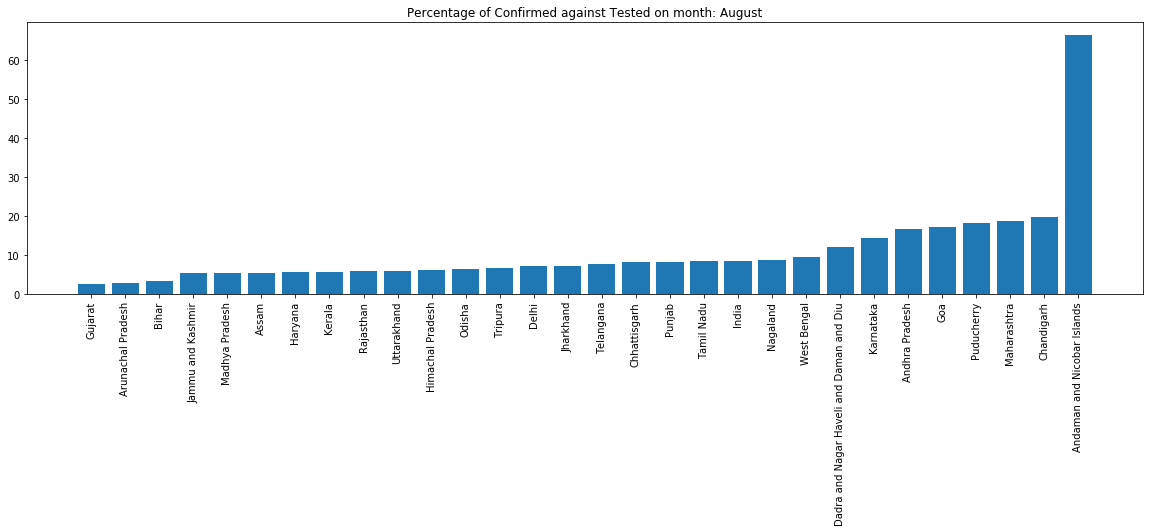

In [104]:
plt.figure(figsize = (20, 5))
plt.title('Percentage of Confirmed against Tested on month: August')
plt.xticks(rotation = 90)
plt.bar(state_wise_positive_table3['Name_Of_State'], state_wise_positive_table3['Positive_Case'])
plt.show()

In [ ]:
state_wise_confirmed1['percentage_positive'] = (state_wise_confirmed1.Confirmed / state_wise_confirmed1.Tested )*100
state_wise_confirmed2 = state_wise_confirmed1[state_wise_confirmed1['Date'] == '2020-09-04']

In [ ]:
state_wise_confirmed3 = state_wise_confirmed2.sort_values(by = 'percentage_positive')
state_wise_confirmed3

In [ ]:
plt.figure(figsize = (20, 5))
plt.title('Percentage of Confirmed against Tested')
plt.xticks(rotation = 90)
plt.bar(state_wise_confirmed3['State'], state_wise_confirmed3['percentage_positive'])
plt.show()

In [ ]:
date_tested = ['2020-08-27','2020-08-28','2020-08-29','2020-08-30','2020-08-31','2020-09-01','2020-09-02','2020-09-03','2020-09-04']

for dt in date_tested:
    state_wise_confirmed4 = state_wise_confirmed1[state_wise_confirmed1['Date'] == dt]
    state_wise_confirmed5 = state_wise_confirmed4.sort_values(by = 'percentage_positive')
    plt.figure(figsize = (20, 5))
    plt.title('Percentage of Confirmed against Tested on '+ dt)
    plt.xticks(rotation = 90)
    plt.bar(state_wise_confirmed5['State'], state_wise_confirmed5['percentage_positive'])
    plt.show()
        

In [ ]:
state_wise_confirmed

In [52]:
daily_count = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
print (daily_count['Status'].unique())
daily_count[daily_count['Status'] == 'Confirmed']

['Confirmed' 'Recovered' 'Deceased']


,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
6,16-Mar-20,Confirmed,15,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,17-Mar-20,Confirmed,11,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
12,18-Mar-20,Confirmed,37,0,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,31-Aug-20,Confirmed,68766,28,10004,78,3266,1324,191,1411,...,1466,1466,25,5956,1873,321,4782,592,2993,0
513,01-Sep-20,Confirmed,78168,28,10368,100,2684,1928,204,1884,...,1516,1470,18,5928,2734,509,5343,571,2943,0
516,02-Sep-20,Confirmed,82860,26,10392,148,3555,1969,239,2296,...,1481,1511,34,5990,2892,566,5682,836,2976,0
519,03-Sep-20,Confirmed,84156,37,10199,214,3054,1922,276,2284,...,1526,1553,34,5892,2817,590,5662,946,2984,0


In [ ]:
state_wise_situation = pd.read_csv('https://api.covid19india.org/csv/latest/tested_numbers_icmr_data.csv')
state_wise_situation